  # **Trabajo Práctico 3**

    Año: 2025
    Materia: Minería de Datos
    Integrantes: Juan Andres Morales, Genaro Canciani
    

# EDA

In [50]:
import os

# Análisis exploratorio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl

# Preparación de los datos
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn import datasets

# Clasificador SVM
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay ,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dxWeather.csv')
df.head()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica,Localizacion,TipoClima,Estacion
0,39,96,8.5,71,1011.43,Llanura,Nublado,Primavera
1,30,64,7.0,16,1018.72,Montania,Soleado,Primavera
2,38,83,1.5,82,1026.25,Costa,Soleado,Primavera
3,32,55,3.5,26,1010.03,Llanura,Nublado,Verano
4,3,85,6.0,96,984.46,Llanura,Nevado,Invierno


In [4]:
df.describe()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,21.872349,67.195045,9.634936,50.796333,1007.685836
std,16.426722,20.463797,6.795890,32.333798,38.763971
min,-24.000000,20.000000,0.000000,0.000000,800.230000
25%,13.000000,55.000000,5.000000,18.000000,998.570000
50%,23.000000,69.000000,8.500000,53.000000,1010.315000
75%,32.000000,81.000000,13.500000,80.000000,1017.820000
max,109.000000,109.000000,47.500000,109.000000,1199.210000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


In [30]:
print(df.isna().sum()[df.isna().sum() > 0]) # no hay nulos

Series([], dtype: int64)


In [8]:
localizaciones_unicas = df.Localizacion.unique()
print(localizaciones_unicas)

climas_unicos = df.TipoClima.unique()
print(climas_unicos)

estaciones_unicas = df.Estacion.unique()
print(estaciones_unicas)

['Llanura' 'Montania' 'Costa']
['Nublado' 'Soleado' 'Nevado' 'Lluvioso']
['Primavera' 'Verano' 'Invierno' 'Otonio']


In [51]:
# Codificamos columnas categoricas
columnas = ['Localizacion', 'TipoClima']

enc = OneHotEncoder(sparse_output=False)
cols = enc.fit_transform(df[columnas])
enc_df = pd.DataFrame(cols, columns=enc.get_feature_names_out(['Localizacion', 'TipoClima']), index=df.index)
df_final = pd.concat([enc_df, df], axis=1).drop(columns=['Localizacion', 'TipoClima'],axis=1)


## split

In [54]:
# Separo variable objetivo de datos
X = df_final.drop('Estacion', axis=1)
y = df_final['Estacion']

In [55]:
# Obtengo datos de entrenamiento y de testeo
Xtrn, Xtst, ytrn, ytst  = train_test_split(X, y, test_size=0.2,
                            random_state=1234, shuffle=True, stratify=y)

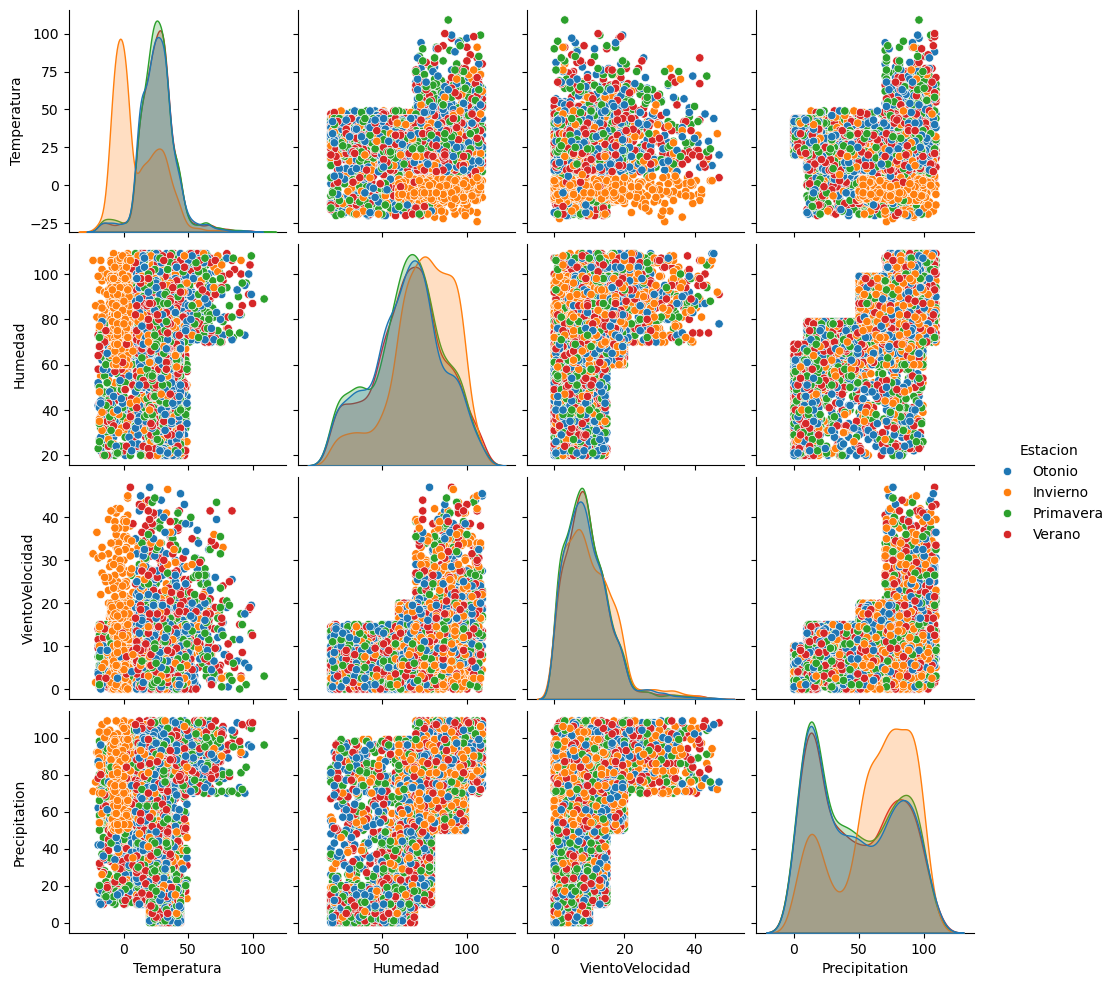

In [56]:
numerical_cols = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation']
sns.pairplot(pd.concat([Xtrn[numerical_cols], ytrn], axis=1), hue='Estacion')
plt.show()

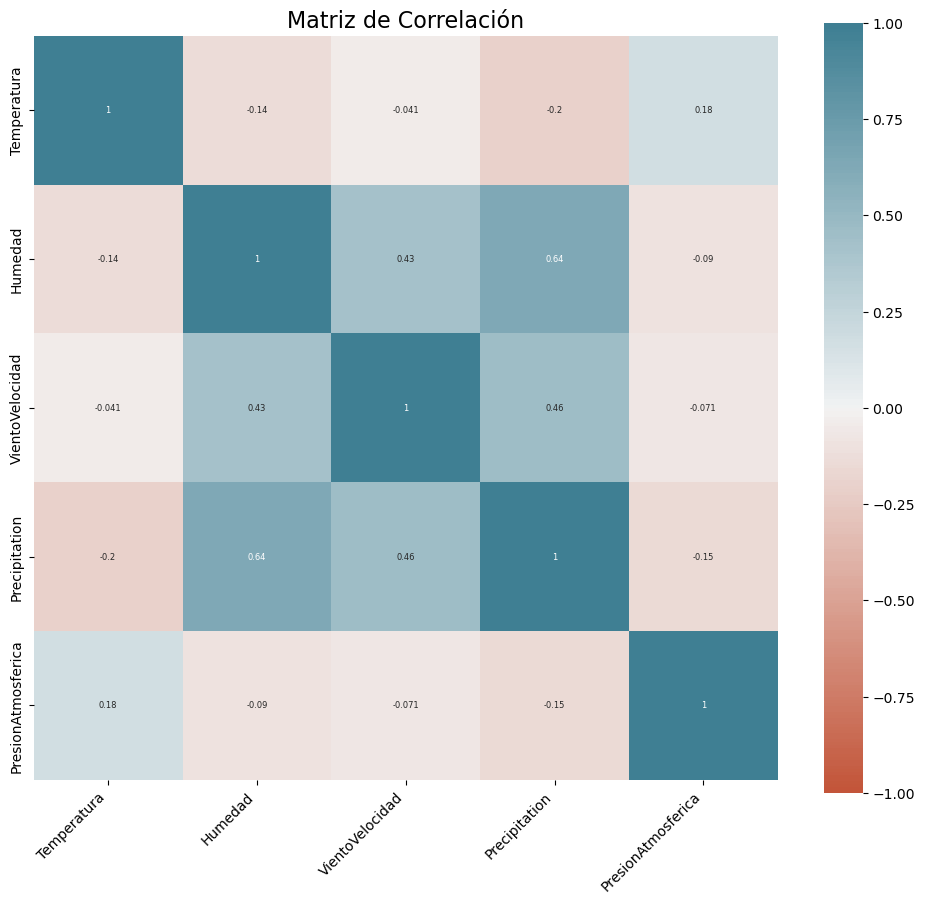

In [57]:
num_cols = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica']
plt.figure(figsize=(12, 10))
corr = Xtrn[num_cols].corr(method='pearson')
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

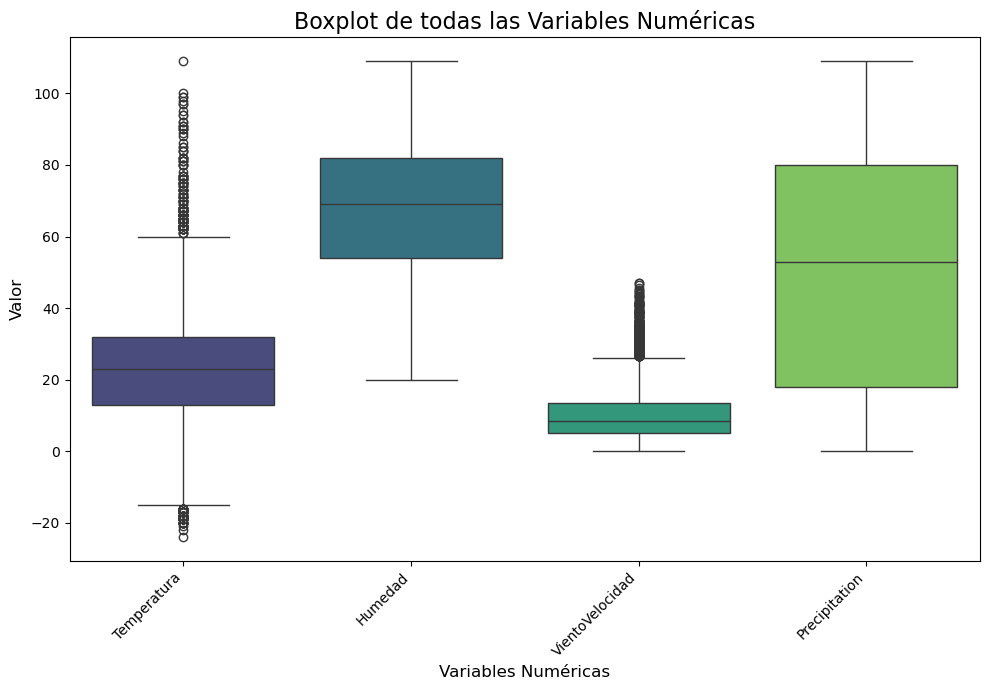

In [58]:
df_numerical = Xtrn[numerical_cols]


plt.figure(figsize=(10, 7)) 
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('Boxplot de todas las Variables Numéricas', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Variables Numéricas', fontsize=12)


plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

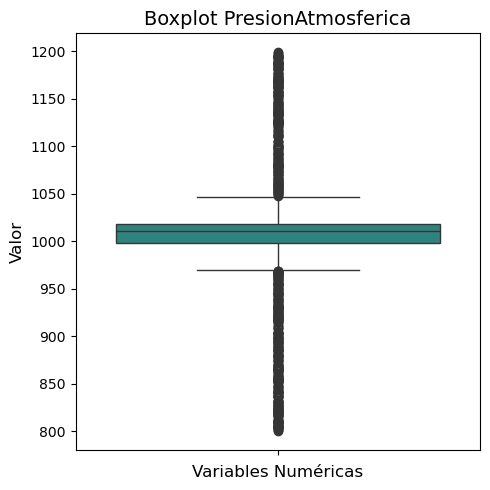

In [59]:
plt.figure(figsize=(5, 5)) 
sns.boxplot(data=Xtrn, y='PresionAtmosferica', palette='viridis')
plt.title('Boxplot PresionAtmosferica', fontsize=14)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Variables Numéricas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()
plt.show()

In [60]:
# Se usa winsorizer para cappear los outliers vistos en las distribuciones del grafico anterior
capper = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=['Temperatura', 'VientoVelocidad', 'PresionAtmosferica'])

capper.fit(Xtrn)
# Transformamos los datos
Xtrn = capper.transform(Xtrn)
Xtst = capper.transform(Xtst)

In [61]:
Xtrn

,Localizacion_Costa,Localizacion_Llanura,Localizacion_Montania,TipoClima_Lluvioso,TipoClima_Nevado,TipoClima_Nublado,TipoClima_Soleado,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica
581,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22.0,62,9.0,26,1019.79
8847,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-8.0,91,12.5,68,980.85
6009,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,59,8.5,5,1014.26
7402,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0,73,17.0,91,1016.38
4489,0.0,0.0,1.0,0.0,0.0,0.0,1.0,30.0,46,4.0,5,1013.53
...,...,...,...,...,...,...,...,...,...,...,...,...
8700,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,68,10.5,43,1016.11
7101,1.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,70,14.5,41,1010.39
7877,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,66,8.0,35,1046.88
572,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,82,16.5,107,1011.48
